# Inlcuding Header Files 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve , roc_auc_score
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Loading the dataset

In [4]:
file = pd.read_csv("data.csv" , index_col= 0)
file.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Dividing dataset into features and result

In [5]:
x = file[["location" , "country" , "gender" , "age" , "vis_wuhan" , "from_wuhan" , "symptom1" , "symptom2" , "symptom3"
          , "symptom4" , "symptom5" , "symptom6" , "diff_sym_hos"]].values ## features
y = file.result.values ## result

# Resampling dataset

In [6]:
## splitting the dataset into xTrain , yTrain , xTest , yTest
xTrain , xTest , yTrain , yTest = train_test_split(x,y, test_size= 0.2 , shuffle= True , random_state= 3)

# Naive Bayes has no Hyperparameters to tune

# Naive Bayes model

In [7]:
gnb = GaussianNB()
gnb.fit(xTrain , yTrain)

GaussianNB()

we will predict the output for the test data

In [8]:
y_pred = gnb.predict(xTest)

# Evaluating the model

we will evaluate our model using the confusion matrix and classification report by comparing the predicted and actual test values

In [9]:
cm = confusion_matrix(yTest, y_pred) ## confusion matrix
cr = classification_report(yTest,y_pred) ## classification report
print("Confusion matrix\n\n" ,cm , "\n")
print(cr)

Confusion matrix

 [[ 45 110]
 [  2  16]] 

              precision    recall  f1-score   support

           0       0.96      0.29      0.45       155
           1       0.13      0.89      0.22        18

    accuracy                           0.35       173
   macro avg       0.54      0.59      0.33       173
weighted avg       0.87      0.35      0.42       173



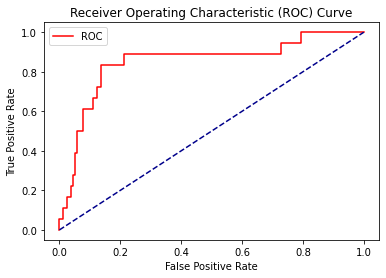

In [11]:
fpr, tpr, thresholds = roc_curve(yTest, gnb.predict_proba(xTest)[:,1])

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [12]:
roc_auc_score(yTest, gnb.predict_proba(xTest)[:,1])

0.8480286738351254